# Figure 14

In [1]:
# Import necessary libraries
from __future__ import division, print_function, unicode_literals

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import tensorflow as tf
import numpy as np
from functools import partial
import glob, os
import pickle
import copy
from PDEsolvers import Burgers_Periodic

In [4]:
# Find the model with lowest validation error
import math

def BestErrorFile(folder_name):

    filename_best = ''
    best_error = 10**6

    current_dir = os.getcwd()
    os.chdir("./" + folder_name)
    for file in glob.glob("*.pkl"):
        with open(file, 'rb') as f:
            params = pickle.load(f)
            if not math.isnan(params['minRegTest']):
                if params['minRegTest'] < best_error:
                    filename_best = file
                    best_error = params['minRegTest']
    os.chdir(current_dir)

    return filename_best

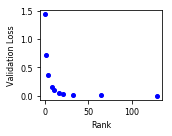

In [6]:
x_vals = np.array([1,2,4,8,11,16,21,32,64,128])
y_vals = np.zeros(10)

folder_names = ['Burgers_exp28_ROM1/','Burgers_exp28_ROM2/','Burgers_exp28_ROM4/','Burgers_exp28_ROM8/','Burgers_exp28_ROM11/']
folder_names = folder_names + ['Burgers_exp28_ROM16/','Burgers_exp28ss/','Burgers_exp28_ROM32/','Burgers_exp28_ROM64/','Burgers_exp28rr/']

for k in range(10):
    folder_name = folder_names[k]  # Folder to be created for saved output
    pkl_file = folder_name + BestErrorFile(folder_name)
    
    with open(pkl_file, 'rb') as f:
        params = pickle.load(f)
    
    y_vals[k] = params['minTest']

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_vals,y_vals,'ob',markersize=4)
plt.xlabel("Rank")
plt.ylabel("Validation Loss")
plt.tight_layout()
plt.show()

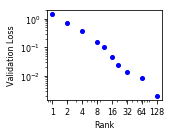

In [7]:
x_vals = np.array([1,2,4,8,11,16,21,32,64,128])
y_vals = np.zeros(10)

folder_names = ['Burgers_exp28_ROM1/','Burgers_exp28_ROM2/','Burgers_exp28_ROM4/','Burgers_exp28_ROM8/','Burgers_exp28_ROM11/']
folder_names = folder_names + ['Burgers_exp28_ROM16/','Burgers_exp28ss/','Burgers_exp28_ROM32/','Burgers_exp28_ROM64/','Burgers_exp28rr/']

for k in range(10):
    folder_name = folder_names[k]  # Folder to be created for saved output
    pkl_file = folder_name + BestErrorFile(folder_name)
    
    with open(pkl_file, 'rb') as f:
        params = pickle.load(f)
    
    y_vals[k] = params['minTest']

plt.figure(figsize=(2.5,2))
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.plot(x_vals,y_vals,'ob',markersize=4)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Rank")
plt.ylabel("Validation Loss")
plt.xticks(2**(np.arange(8)))
ax = plt.gca()
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()
plt.show()